In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy

import numpy as np
from scipy import ndimage

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt
from matplotlib import colors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
from unagi import config
from unagi import hsc
from unagi import mask
from unagi import plotting
from unagi.task import hsc_cutout, hsc_tricolor

pdr2 = hsc.Hsc(dr='pdr2', rerun='pdr2_wide')

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/pdr2_wide/pdr2_wide_tables.fits


In [88]:
from caterpillar import catalog

## Test the Dynamical Cutout Size for HSC Dwarf Candidates

In [7]:
merian_dir = '/Users/song/Downloads/merian/'

cat_g09 = Table.read(os.path.join(merian_dir, 'catalog', 'Broadcut_GAMA09H.fits'))

In [11]:
# Remove all the `isnull` columns
cat_g09 = catalog.remove_is_null(os.path.join(merian_dir, 'catalog', 'Broadcut_GAMA09H.fits'), return_data=True)

Reading the data....
Saving data to None ...


In [17]:
cat_g09 = catalog.moments_to_shape(cat_g09, shape_type='i_sdss_shape', update=True)
cat_g09 = catalog.moments_to_shape(cat_g09, shape_type='i_cmodel_exp_ellipse', update=True)
cat_g09 = catalog.moments_to_shape(cat_g09, shape_type='i_cmodel_ellipse', update=True)
cat_g09 = catalog.moments_to_shape(cat_g09, shape_type='r_cmodel_exp_ellipse', update=True)
cat_g09 = catalog.moments_to_shape(cat_g09, shape_type='r_cmodel_ellipse', update=True)

In [18]:
print(len(cat_g09))
print(cat_g09.colnames)

3049545
['object_id', 'ra', 'dec', 'tract', 'patch', 'a_g', 'a_r', 'a_i', 'a_z', 'a_y', 'g_cmodel_exp_flux', 'g_cmodel_exp_fluxsigma', 'r_cmodel_exp_flux', 'r_cmodel_exp_fluxsigma', 'i_cmodel_exp_flux', 'i_cmodel_exp_fluxsigma', 'z_cmodel_exp_flux', 'z_cmodel_exp_fluxsigma', 'y_cmodel_exp_flux', 'y_cmodel_exp_fluxsigma', 'g_cmodel_flux', 'g_cmodel_fluxsigma', 'r_cmodel_flux', 'r_cmodel_fluxsigma', 'i_cmodel_flux', 'i_cmodel_fluxsigma', 'z_cmodel_flux', 'z_cmodel_fluxsigma', 'y_cmodel_flux', 'y_cmodel_fluxsigma', 'g_cmodel_mag', 'g_cmodel_magsigma', 'r_cmodel_mag', 'r_cmodel_magsigma', 'i_cmodel_mag', 'i_cmodel_magsigma', 'z_cmodel_mag', 'z_cmodel_magsigma', 'y_cmodel_mag', 'y_cmodel_magsigma', 'g_cmodel_flag', 'r_cmodel_flag', 'i_cmodel_flag', 'z_cmodel_flag', 'y_cmodel_flag', 'g_psf_flux', 'g_psf_fluxsigma', 'r_psf_flux', 'r_psf_fluxsigma', 'i_psf_flux', 'i_psf_fluxsigma', 'z_psf_flux', 'z_psf_fluxsigma', 'y_psf_flux', 'y_psf_fluxsigma', 'g_psf_flag', 'r_psf_flag', 'i_psf_flag', 'z_ps

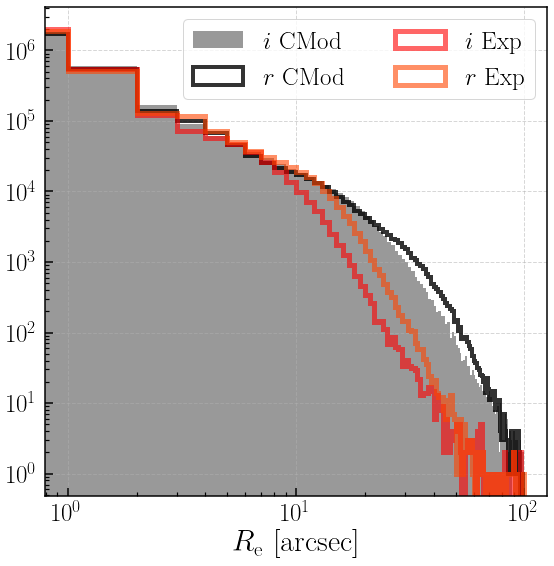

In [63]:
plt.figure(figsize=(9, 9))
plt.loglog()

_ = plt.hist(cat_g09['i_cmodel_ellipse_r'], range=(0, 100), bins=100, color='grey', alpha=0.8, 
             label=r'$i\ \rm CMod$')
_ = plt.hist(cat_g09['r_cmodel_ellipse_r'], range=(0, 100), bins=100, color='k', alpha=0.8, 
             histtype='step', linewidth=4, label=r'$r\ \rm CMod$')

_ = plt.hist(cat_g09['i_cmodel_exp_ellipse_r'], range=(0, 100), bins=100, histtype='step', 
             color='red', linewidth=5, alpha=0.6, label=r'$i\ \rm Exp$')

_ = plt.hist(cat_g09['r_cmodel_exp_ellipse_r'], range=(0, 100), bins=100, histtype='step', 
             color='orangered', linewidth=5, alpha=0.6, label=r'$r\ \rm Exp$')

plt.legend(fontsize=25, ncol=2)

_ = plt.xlabel(r'$R_{\rm e}\ [\rm arcsec]$', fontsize=30)

<ipython-input-84-5875a04645e8>:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hexbin(cat_g09['i_cmodel_mag'], np.log10(cat_g09['i_cmodel_exp_ellipse_r']),


Text(0, 0.5, '$\\log\\ (R_{\\rm CMod,\\ Exp,\\ i}/[\\rm arcsec])$')

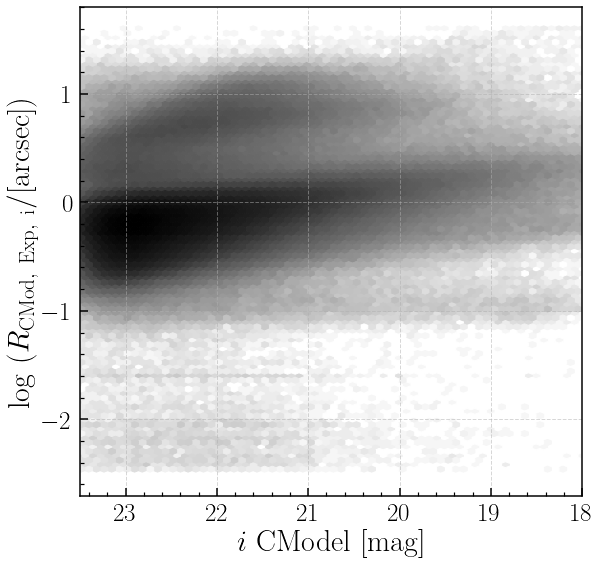

In [84]:
plt.figure(figsize=(9, 9))

plt.hexbin(cat_g09['i_cmodel_mag'], np.log10(cat_g09['i_cmodel_exp_ellipse_r']), 
           extent=(17.5, 24.2, -2.5, 1.6), vmin=1, cmap='Greys', bins='log', gridsize=(80, 50))

plt.xlim(23.5, 18.0)

plt.xlabel(r'$i\ \rm CModel\ [mag]$', fontsize=30)
plt.ylabel(r'$\log\ (R_{\rm CMod,\ Exp,\ i}/[\rm arcsec])$', fontsize=30)

<ipython-input-68-68044642c9bc>:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hexbin(cat_g09['photoz_mean'], np.log10(cat_g09['i_cmodel_exp_ellipse_r']),


Text(0, 0.5, '$\\log\\ (R_{\\rm CMod,\\ Exp,\\ i}/[\\rm arcsec])$')

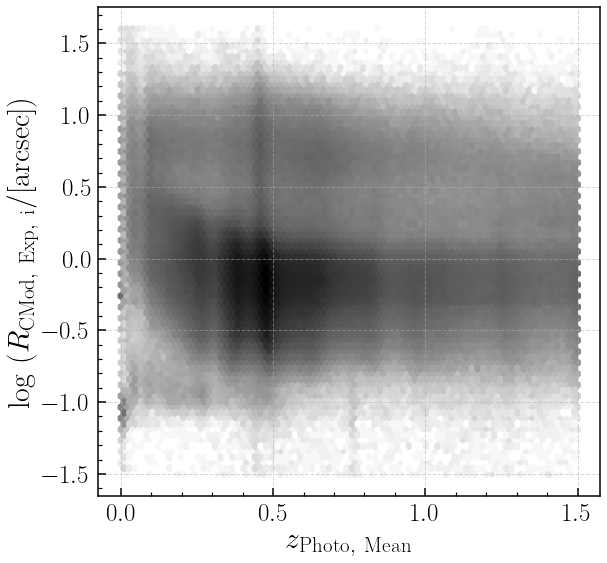

In [68]:
plt.figure(figsize=(9, 9))

plt.hexbin(cat_g09['photoz_mean'], np.log10(cat_g09['i_cmodel_exp_ellipse_r']), 
           extent=(0, 1.5, -1.5, 1.6), vmin=1, cmap='Greys', bins='log', gridsize=(80, 40))

plt.xlabel(r'$z_{\rm Photo,\ Mean}$', fontsize=30)
plt.ylabel(r'$\log\ (R_{\rm CMod,\ Exp,\ i}/[\rm arcsec])$', fontsize=30)

In [77]:
large_flag = np.log10(cat_g09['i_cmodel_exp_ellipse_r']) >= 0.5
small_flag = (np.log10(cat_g09['i_cmodel_exp_ellipse_r']) <= -0.8) & (cat_g09['i_cmodel_mag'] <= 22.0)

In [79]:
sample_1 = cat_g09[~large_flag]
sample_2 = cat_g09[large_flag]
sample_3 = cat_g09[small_flag]

In [80]:
random_1 = Table(np.random.choice(sample_1, 200, replace=False))
random_2 = Table(np.random.choice(sample_2, 100, replace=False))
random_3 = Table(np.random.choice(sample_3, 100, replace=False))

<ipython-input-85-b2f489035bdf>:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hexbin(cat_g09['i_cmodel_mag'], np.log10(cat_g09['i_cmodel_exp_ellipse_r']),


Text(0, 0.5, '$\\log\\ (R_{\\rm CMod,\\ Exp,\\ i}/[\\rm arcsec])$')

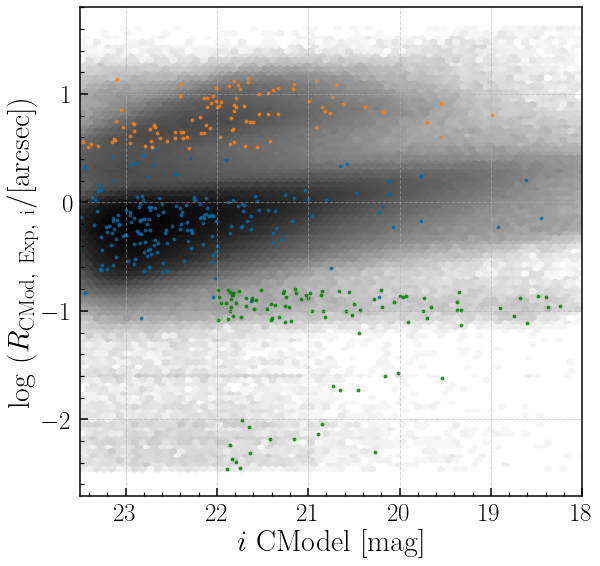

In [85]:
plt.figure(figsize=(9, 9))

plt.hexbin(cat_g09['i_cmodel_mag'], np.log10(cat_g09['i_cmodel_exp_ellipse_r']), 
           extent=(17.5, 24.2, -2.5, 1.6), vmin=1, cmap='Greys', bins='log', gridsize=(80, 50))

plt.scatter(random_1['i_cmodel_mag'], np.log10(random_1['i_cmodel_exp_ellipse_r']), s=8, alpha=0.8)
plt.scatter(random_2['i_cmodel_mag'], np.log10(random_2['i_cmodel_exp_ellipse_r']), s=8, alpha=0.8)
plt.scatter(random_3['i_cmodel_mag'], np.log10(random_3['i_cmodel_exp_ellipse_r']), s=8, alpha=0.8, c='g')

plt.xlim(23.5, 18.0)

plt.xlabel(r'$i\ \rm CModel\ [mag]$', fontsize=30)
plt.ylabel(r'$\log\ (R_{\rm CMod,\ Exp,\ i}/[\rm arcsec])$', fontsize=30)

In [117]:
def show_obj(obj, archive=pdr2):
    """Show 3-Color picture"""
    coord = SkyCoord(obj['ra'], obj['dec'], unit='deg')
    
    # Angular size
    s_ang = 10.0 * obj['i_cmodel_exp_ellipse_r']
    s_ang = s_ang if s_ang <= 20 else 20
    s_ang = s_ang if s_ang >= 3 else 3

    cutout_rgb, cutout_wcs = hsc_tricolor(
        coord, cutout_size=s_ang, filters='gri', verbose=False, 
        save_rgb=False, save_img=False, use_saved=False, archive=pdr2)
    
    return plotting.display_single(cutout_rgb)

In [ ]:
random_1.write(os.path.join(merian_dir, 'catalog', 'random_1', 'random_1.fits'), overwrite=True)

for ii, obj in enumerate(random_1):    
    fig = show_obj(obj)
    fig.savefig(
        os.path.join(merian_dir, 'catalog', 'random_1', 'random_1_obj_{:d}.png'.format(ii + 1)))

/Users/song/Dropbox/work/project/unagi/unagi/plotting.py:270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(xsize, ysize))


In [ ]:
random_2.write(os.path.join(merian_dir, 'catalog', 'random_2', 'random_2.fits'), overwrite=True)

for ii, obj in enumerate(random_2):    
    fig = show_obj(obj)
    fig.savefig(
        os.path.join(merian_dir, 'catalog', 'random_2', 'random_2_obj_{:d}.png'.format(ii + 1)))

In [ ]:
random_3.write(os.path.join(merian_dir, 'catalog', 'random_3', 'random_3.fits'), overwrite=True)

for ii, obj in enumerate(random_3):    
    fig = show_obj(obj)
    fig.savefig(
        os.path.join(merian_dir, 'catalog', 'random_3', 'random_3_obj_{:d}.png'.format(ii + 1)))
